# Importing

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# Data Loading & Data Cleaning

In [22]:
df=pd.read_csv("../summary/summary.csv")
df.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [23]:
df.tail()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

In [25]:
df.isnull().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

In [26]:
df['3PointPercent'] = df['3PointPercent'].fillna(df['3PointPercent'].mean())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1340 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

In [28]:
df=df.drop(columns=["Name"])

In [29]:
df.head()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [30]:
df.describe(include="all")

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,15.956966,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


# # Exploratory Data Analysis (EDA)

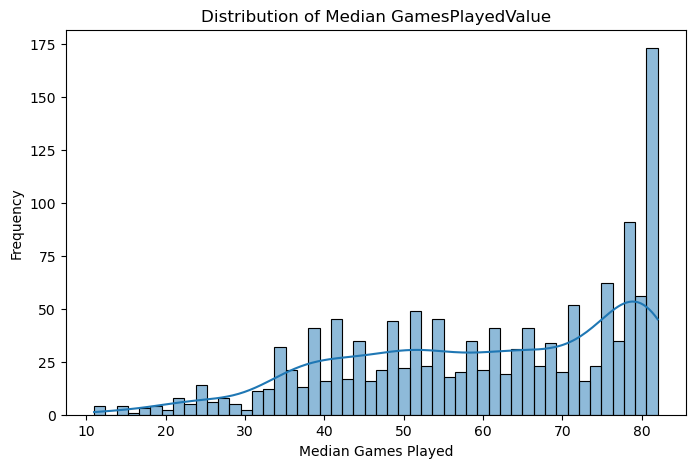

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df['GamesPlayed'], bins=50, kde=True)
plt.title('Distribution of Median GamesPlayedValue')
plt.xlabel('Median Games Played')
plt.ylabel('Frequency')
plt.show()

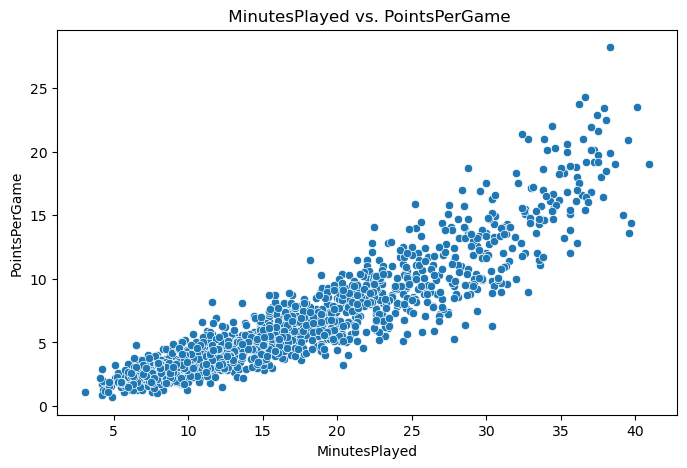

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MinutesPlayed', y='PointsPerGame', data=df)
plt.title(' MinutesPlayed vs. PointsPerGame')
plt.xlabel('MinutesPlayed')
plt.ylabel('PointsPerGame')
plt.show()

E:\Program Files\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


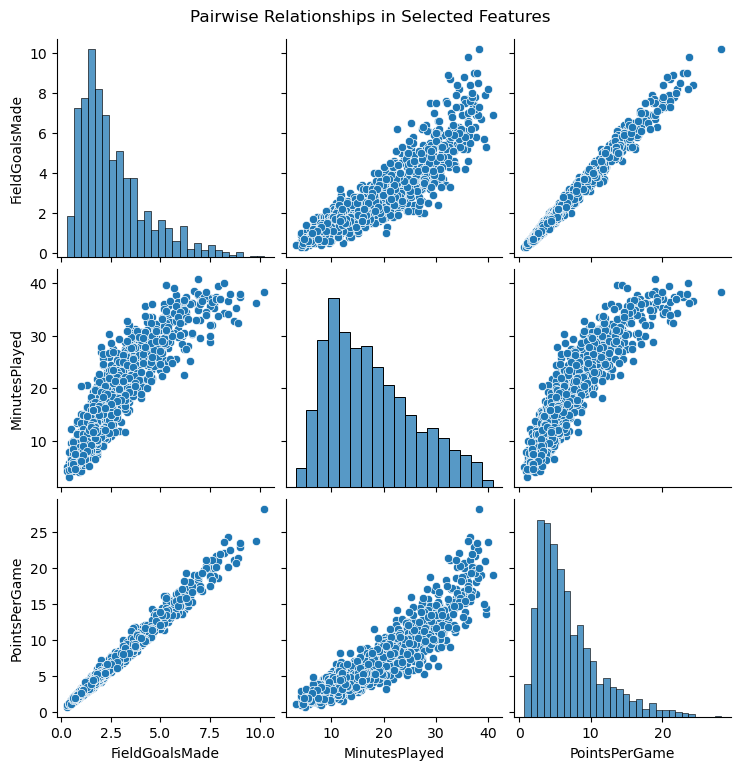

In [33]:
sns.pairplot(df[['FieldGoalsMade', 'MinutesPlayed', 'PointsPerGame']])
plt.suptitle("Pairwise Relationships in Selected Features", y=1.02)
plt.show()

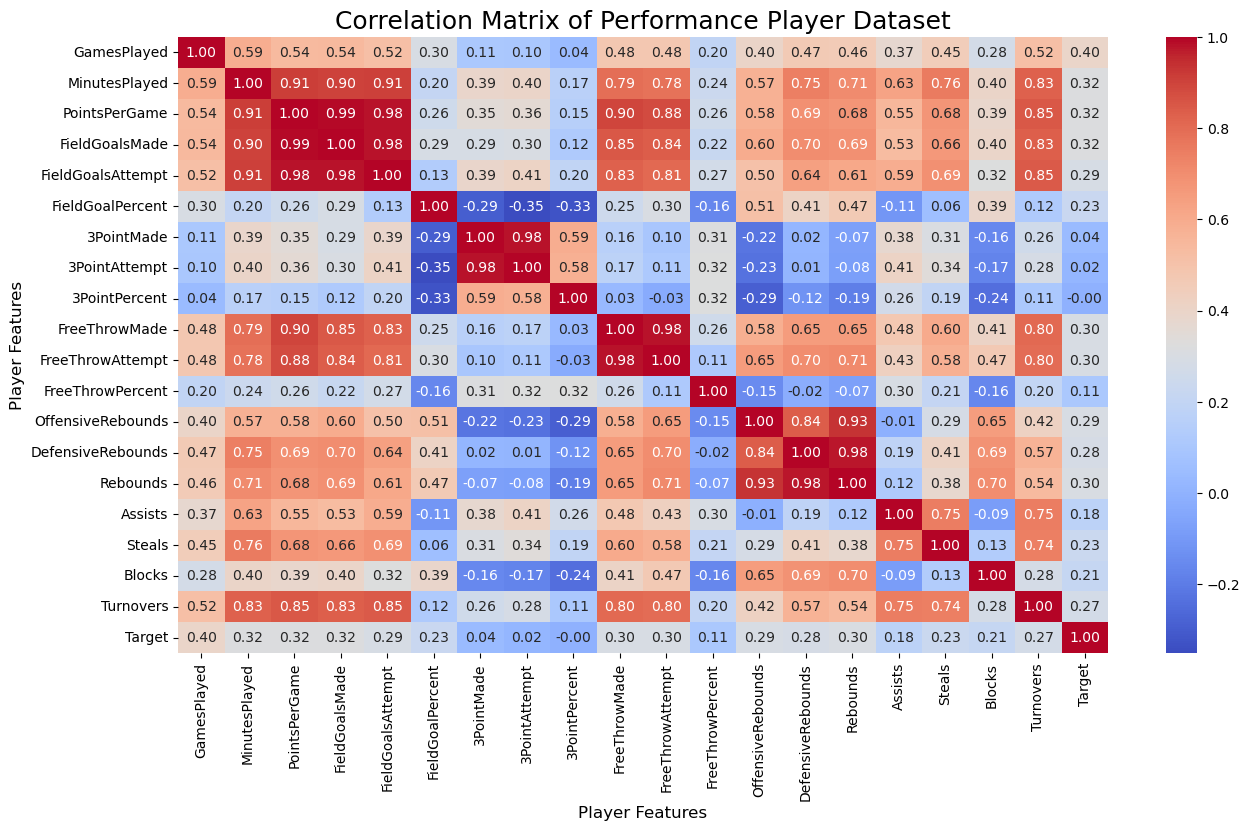

In [37]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Player Dataset', fontsize=18)
plt.xlabel('Player Features', fontsize=12)
plt.ylabel('Player Features', fontsize=12)
plt.show()

# training data

Epoch 1/200
27/27 [==============================] - 14s 89ms/step - loss: 0.9709 - val_loss: 0.7072
Epoch 2/200
27/27 [==============================] - 1s 29ms/step - loss: 0.4721 - val_loss: 0.0745
Epoch 3/200
27/27 [==============================] - 1s 25ms/step - loss: 0.0881 - val_loss: 0.0363
Epoch 4/200
27/27 [==============================] - 1s 26ms/step - loss: 0.0598 - val_loss: 0.0228
Epoch 5/200
27/27 [==============================] - 1s 30ms/step - loss: 0.0485 - val_loss: 0.0208
Epoch 6/200
27/27 [==============================] - 1s 30ms/step - loss: 0.0453 - val_loss: 0.0160
Epoch 7/200
27/27 [==============================] - 1s 32ms/step - loss: 0.0462 - val_loss: 0.0165
Epoch 8/200
27/27 [==============================] - 1s 27ms/step - loss: 0.0424 - val_loss: 0.0131
Epoch 9/200
27/27 [==============================] - 1s 21ms/step - loss: 0.0387 - val_loss: 0.0123
Epoch 10/200
27/27 [==============================] - 1s 35ms/step - loss: 0.0411 - val_loss: 0.013

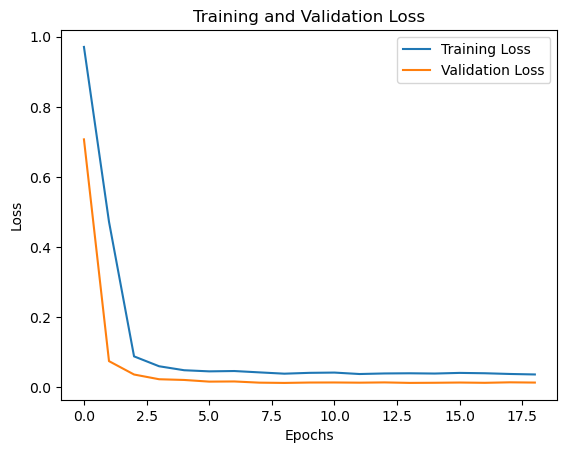

Enter the Field Goals Made: 5.6
Enter the Minutes Played: 15.9
Enter the Target: 1
1/1 [==============================] - 0s 64ms/step
Predicted Points Per Game: 11.567113876342773


In [35]:
train, test = train_test_split(df, test_size=0.2)
test_pred = test.copy()

x_train = train[['FieldGoalsMade', 'MinutesPlayed', 'Target']].values
x_test = test[['FieldGoalsMade', 'MinutesPlayed', 'Target']].values
y_train = train['PointsPerGame'].values
y_test = test['PointsPerGame'].values

 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))


time_steps = 1  
x_train_lstm = np.reshape(x_train, (x_train.shape[0], time_steps, x_train.shape[1]))
x_test_lstm = np.reshape(x_test, (x_test.shape[0], time_steps, x_test.shape[1]))


model_rnn = Sequential([
    LSTM(100, activation='relu', input_shape=(time_steps, x_train.shape[1]), return_sequences=True),
    Dropout(0.3),
    LSTM(100, activation='relu'),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(1)   
])


optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='mean_squared_error')


early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,          
    restore_best_weights=True 
)
history = model_rnn.fit(
    x_train_lstm,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  
)


loss = model_rnn.evaluate(x_test_lstm, y_test)
print(f'Test Loss: {loss}')


y_pred = model_rnn.predict(x_test_lstm)

y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)

# حساب دقة النموذج
print("MSE", round(mean_squared_error(y_test, y_pred), 3))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print("MAE", round(mean_absolute_error(y_test, y_pred), 3))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred), 3))
print("R2 Score:", round(r2_score(y_test, y_pred), 3) * 100)

# رسم منحنى الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

def predicted_player_perform(field_goals_made, minutes_played, target):
    

    input_data = np.array([[field_goals_made, minutes_played, target]])
    input_data = scaler.transform(input_data)
    input_data = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))
    
    predicted_points_per_game = model_rnn.predict(input_data)
    
    predicted_points_per_game = y_scaler.inverse_transform(predicted_points_per_game)
    return predicted_points_per_game[0][0]

user_field_goals_made = float(input("Enter the Field Goals Made: "))
user_minutes_played = float(input("Enter the Minutes Played: "))
user_target = float(input("Enter the Target: "))

predicted_performance = predicted_player_perform(user_field_goals_made, user_minutes_played, user_target)
print(f"Predicted Points Per Game: {predicted_performance}")